## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups #fetch_mldata didn't work, had to replace it with fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial.distance import minkowski
from sklearn.neighbors import KDTree

In [3]:

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        if (self.algorithm == 'brute'):
            self.X_train = X
            self.y_train = y
            self.n_classes = len(set(y))
        if (self.algorithm == 'kd_tree'):
            self.X_train = np.asarray(X)
            self.y_train = np.reshape(np.asarray(y), (-1, 1))
            self.n_classes = len(set(y))
            self.data = np.hstack((self.X_train, self.y_train))
    
    def predict(self, X):
        labels = []
        dists = []
        if (self.algorithm == 'brute'):
            data = []
            for i in range(len(self.y_train)):
                data.append((self.X_train[i], self.y_train[i]))
            for x_0 in X:
                dists = [[minkowski(x_0, x[0]), x[1]] for x in data]
                neighbors = [0 for i in range(self.n_classes)]
                for i in sorted(dists)[0:self.n_neighbors]:
                    neighbors[i[1]] += 1
                labels.append(neighbors.index(max(neighbors)))
        if (self.algorithm == 'kd_tree'):
            tree = KDTree(self.data[:, 0:len(X[0])])  
            for i in range(len(X)):            
                dist, ind = tree.query(X[i:i+1], k=self.n_neighbors)
                classes = [0 for i in range(self.n_classes)]
                for i in np.ravel(ind):
                    classes[int(self.data[i, len(X[0])])] += 1
                labels.append(classes.index(max(classes)))
        return labels


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [11]:
%time clf.predict(X_test)

Wall time: 4 ms


array([2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0])

In [12]:
%time my_clf.predict(X_test)

Wall time: 20 ms


[2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0]

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [17]:
%time clf.predict(X_test)

Wall time: 2 ms


array([2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0])

In [18]:
%time my_clf.predict(X_test)

Wall time: 999 µs


[2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0]

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

In [23]:
vectorizer = CountVectorizer(max_df=0.8, min_df=10)
X1 = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
kf = KFold(n_splits=3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
def opt(metr, X):
    res = []
    for i in range(10):
        clf = KNeighborsClassifier(n_neighbors = i+1, metric=metr)
        score = []
        for train_index, test_index in kf.split(X):
            X_train = X[train_index]
            y_train = target[train_index]
            X_test = X[test_index]
            y_test = target[test_index]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            score.append(accuracy_score(y_test, y_pred))
        mean = sum(score)/3
        res.append(mean)
    return res

In [26]:
x = [i+1 for i in range(10)]

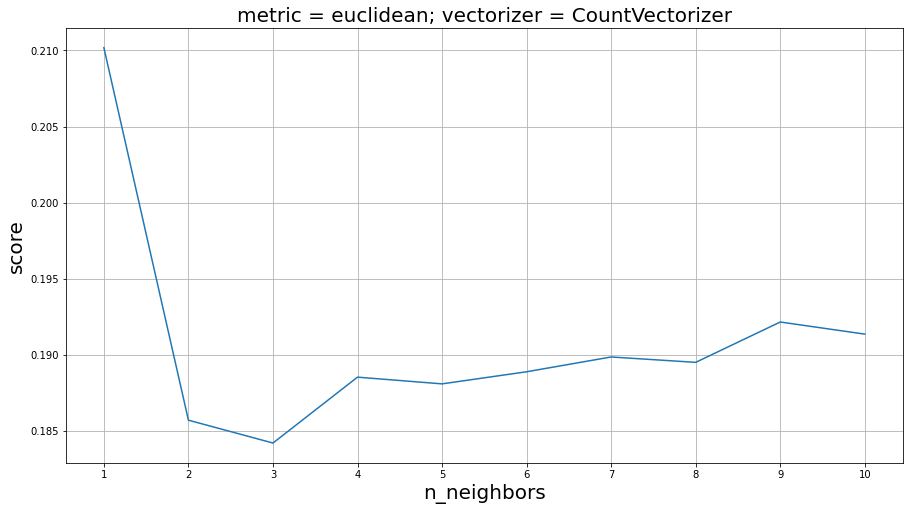

In [27]:
y = opt('euclidean', X1)

plt.figure(figsize=(15,8))

plt.title("metric = euclidean; vectorizer = CountVectorizer", fontsize=20)
plt.xticks(range(1, 11))
plt.ylabel("score", fontsize=20)
plt.xlabel("n_neighbors", fontsize=20)
plt.plot(x, y)
plt.grid(True)

plt.show()

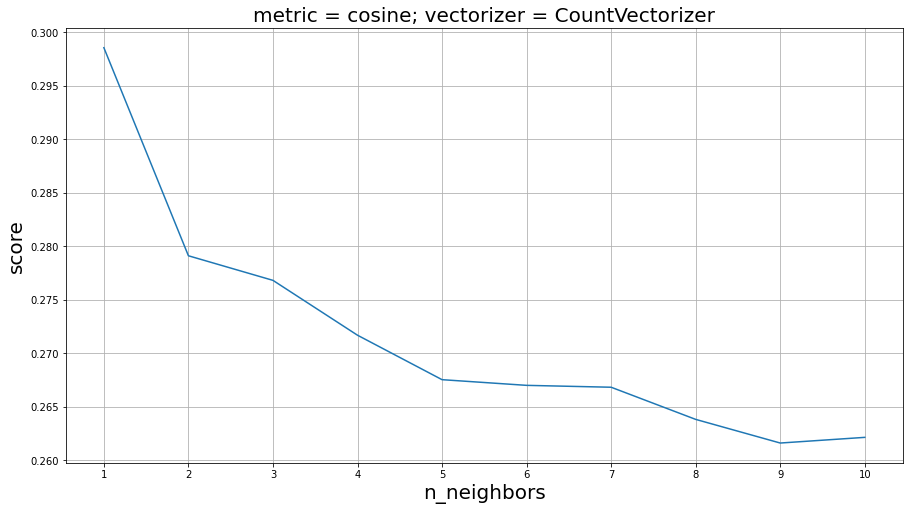

In [28]:
y = opt('cosine', X1)

plt.figure(figsize=(15,8))

plt.title("metric = cosine; vectorizer = CountVectorizer", fontsize=20)
plt.xticks(range(1, 11))
plt.ylabel("score", fontsize=20)
plt.xlabel("n_neighbors", fontsize=20)
plt.plot(x, y)
plt.grid(True)

plt.show()

In [29]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=10)
X2 = vectorizer.fit_transform(data)

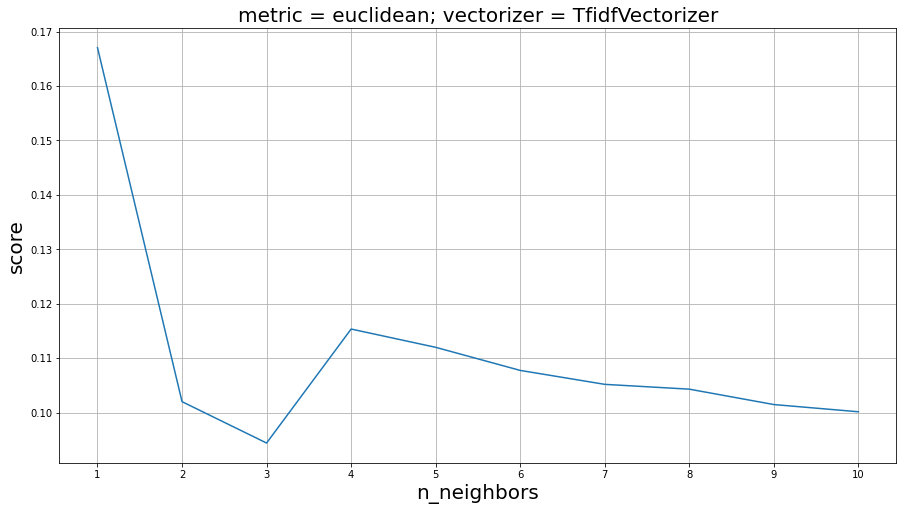

In [30]:
y = opt('euclidean', X2)

plt.figure(figsize=(15,8))

plt.title("metric = euclidean; vectorizer = TfidfVectorizer", fontsize=20)
plt.xticks(range(1, 11))
plt.ylabel("score", fontsize=20)
plt.xlabel("n_neighbors", fontsize=20)
plt.plot(x, y)
plt.grid(True)

plt.show()

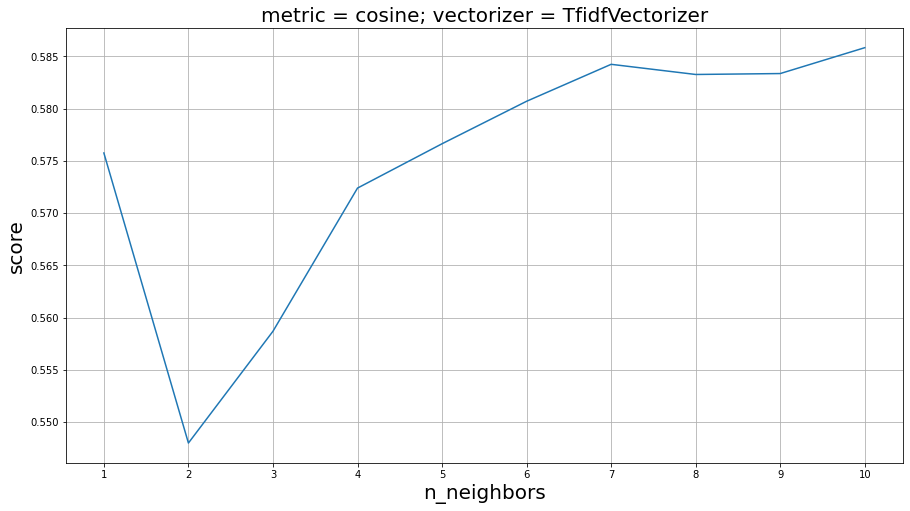

In [31]:
y = opt('cosine', X2)

plt.figure(figsize=(15,8))

plt.title("metric = cosine; vectorizer = TfidfVectorizer", fontsize=20)
plt.xticks(range(1, 11))
plt.ylabel("score", fontsize=20)
plt.xlabel("n_neighbors", fontsize=20)
plt.plot(x, y)
plt.grid(True)

plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

**Ответ**: Лучшая модель - с TfIdf векторизацией, количеством соседей - 10, косинусной метрикой. В целом косинусная метрика дает лучшее качество, чем евклидова, TfIdf векторизация также поднимает качество, так как учитывает важность слов в конкретном тексте.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [32]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [33]:
data_test = newsgroups['data']
target_test = newsgroups['target']
X3 = TfidfVectorizer(max_df=0.8, min_df=10).fit_transform(data_test)

In [35]:
X2.shape

(11314, 10738)

In [36]:
X3.shape

(7532, 7689)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [38]:
clf = KNeighborsClassifier(n_neighbors=10, metric='cosine')
clf.fit(X2[:, 0:7689], target)
pred = clf.predict(X3)
accuracy_score(target_test, pred)

0.06293149229952204

**Ответ**: Качество ужасное, полагаю, что причиной этого является, во-первых, обрезка данных для обучения (иначе не совпадали размерности), во-вторых, видимо, что-то я сделал не так... В идеале, качество должно было быть чуть ниже, чем на кросс-валидации, это бы свидетельствовало о том, что модель действительно обучилась, а не просто выучила тренировочный датасет.